In [7]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q = "select * from sqlite_master where type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [10]:
q1 = "select * from facts limit 5"
pd.read_sql_query(q1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [14]:
q2 = "select min(population), max(population), min(population_growth), max(population_growth) from facts;"
pd.read_sql_query(q2, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [21]:
q3 = "select * from facts where population ==(select max(population) from facts);"
pd.read_sql_query(q3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [23]:
q4 = "select * from facts where population == (select min(population) from facts);"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


### These tables contain rows for the whole world and for Antartica.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22931a36d8>,
      dtype=object)

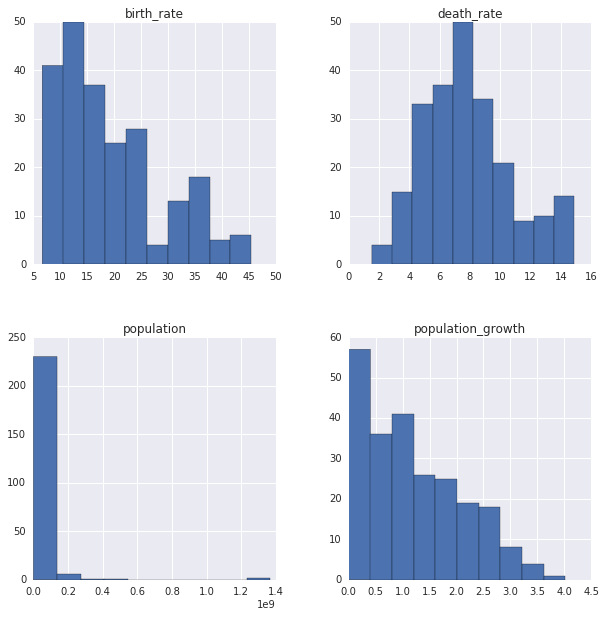

In [36]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q5 = '''select population, population_growth, birth_rate, death_rate from facts
        where population != (select min(population) from facts) 
        and population != (select max(population) from facts)'''
pd.read_sql_query(q5, conn).hist(ax=ax)

In [40]:
q6 = "select name, cast(population as float)/cast(area as float) density from facts"
pd.read_sql_query(q6, conn)

,name,density
0,Afghanistan,49.927697
1,Albania,105.373522
2,Algeria,16.602211
3,Andorra,182.863248
4,Angola,15.741841
5,Antigua and Barbuda,209.131222
6,Argentina,15.620733
7,Armenia,102.759708
8,Australia,2.938944
9,Austria,103.319979


DatabaseError: Execution failed on sql 'name, cast(population as float)/cast(area as float) density from facts
        where population != (select min(population) from facts) 
        and population != (select max(population) from facts)': near "name": syntax error

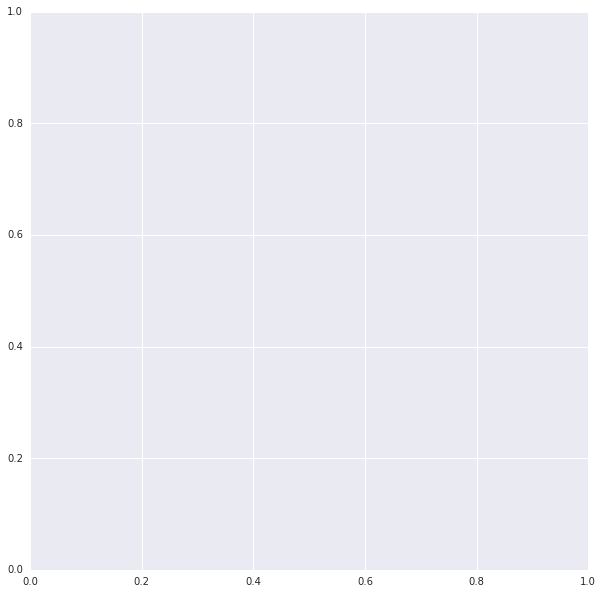

In [54]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q7 = '''name, cast(population as float)/cast(area as float) density from facts
        where population != (select min(population) from facts) 
        and population != (select max(population) from facts)'''
pd.read_sql_query(q7, conn).hist(ax=ax)